<a href="https://colab.research.google.com/github/Putu-Bagus-Arjawa/KNN-Scratch-Iris-Datasets/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter

In [30]:
def euclidian_distance(p, q):
  return np.sqrt(np.sum((p-q)**2))

class KNN:
  def __init__(self, k=3):
    self.k = k
  def fit(self, data):
    self.data = data
  def predict(self, point):
    distances = []
    for label, points in self.data.items():
      for p in points :
        distances.append((euclidian_distance(np.array(point), np.array(p)), label))

    distances.sort(key = lambda x : x[0])
    terdekat = distances[:self.k]

    votes = {}
    for distance, label in terdekat :
      if label in votes:
        votes[label] += 1
      else:
        votes[label] =1
    return max(votes, key= votes.get)


Dataset ini digunakan untuk klasifikasi bunga Iris.  
Sumber dataset: [Kaggle – Iris Dataset](https://www.kaggle.com/datasets/uciml/iris?resource=download)

In [31]:
df = pd.read_csv("Iris.csv")
df = df.drop(columns=["Id"])
print (df.head())

X = df.drop(columns=["Species"]).values
y = df["Species"].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

train_data = {}
for xi, yi in zip(X_train, y_train):
    train_data.setdefault(yi, []).append(xi)

print(list(train_data.keys()))
print("jumlahd datanya: ", len(train_data['Iris-setosa']))
print(train_data)


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']
jumlahd datanya:  31
{'Iris-versicolor': [array([5.5, 2.4, 3.7, 1. ]), array([6.6, 3. , 4.4, 1.4]), array([5.7, 2.9, 4.2, 1.3]), array([5.6, 3. , 4.5, 1.5]), array([5.8, 2.7, 4.1, 1. ]), array([5. , 2. , 3.5, 1. ]), array([5.6, 2.7, 4.2, 1.3]), array([5.7, 3. , 4.2, 1.2]), array([6.2, 2.9, 4.3, 1.3]), array([6. , 2.2, 4. , 1. ]), array([5.4, 3. , 4.5, 1.5]), array([5.5, 2.3, 4. , 1.3]), array([5. , 2.3, 3.3, 1. ]), array([5.5, 2.4, 3.8, 1.1]), array([6.7, 3. , 5. , 1.7]), array([5.9, 3.2, 4.8, 1.8]), arr

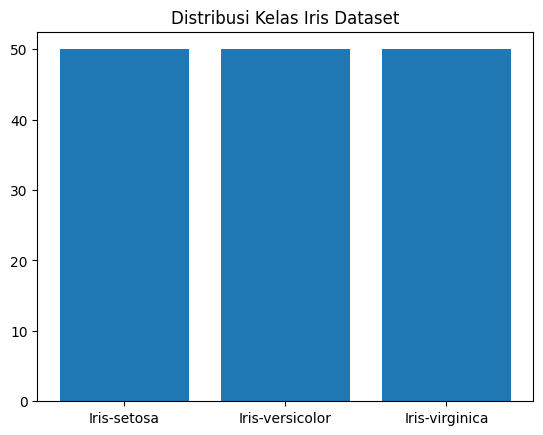

In [32]:
counter = Counter(y)
plt.bar(counter.keys(), counter.values())
plt.title("Distribusi Kelas Iris Dataset")
plt.show()

In [33]:
model = KNN(k = 9)
model.fit(train_data)



In [34]:
input_data = [4.8, 3.75, 1.7, 0.2]
model.predict(input_data)

'Iris-setosa'

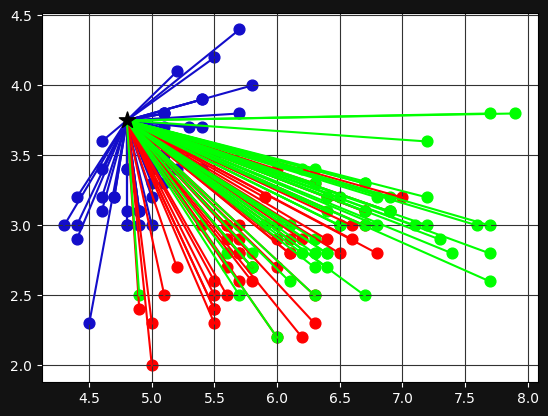

In [35]:
ax = plt.subplot()
ax.grid(True, color= "#323232")
ax.figure.set_facecolor("#121212")
ax.tick_params(axis ="x", colors = "white")
ax.tick_params(axis ="y", colors = "white")

blue_points = df[df["Species"]=="Iris-setosa"][["SepalLengthCm","SepalWidthCm"]].values
red_points  = df[df["Species"]=="Iris-versicolor"][["SepalLengthCm","SepalWidthCm"]].values
green_points = df[df["Species"]=="Iris-virginica"][["SepalLengthCm","SepalWidthCm"]].values

for point in blue_points:
    ax.scatter(point[0], point[1], color="#130DCA", s=60, label="Iris-setosa")
for point in red_points:
    ax.scatter(point[0], point[1], color="#FF0000", s=60, label="Iris-versicolor")
for point in green_points:
    ax.scatter(point[0], point[1], color="#00FF00", s=60, label="Iris-virginica")

pred_label = model.predict([input_data])[0]

color_map = {
    "Iris-setosa": "#130DCA", #biru ya ini, ingat
    "Iris-versicolor": "#FF0000", #merah
    "Iris-virginica": "#00FF00" #ijo
}
input_color = color_map.get(pred_label, "#000000")
ax.scatter(input_data[0], input_data[1], marker="*", color=input_color, s=150, zorder=100)

for point in blue_points:
    ax.plot([input_data[0], point[0]], [input_data[1], point[1]], color="#130DCA")
for point in red_points:
    ax.plot([input_data[0], point[0]], [input_data[1], point[1]], color="#FF0000")
for point in green_points:
    ax.plot([input_data[0], point[0]], [input_data[1], point[1]], color="#00FF00")


plt.show()


In [36]:
prediksi_benar = sum([pred == true for pred, true in zip(y_pred, y_test)])
accuracy = prediksi_benar / len(y_test)
error = 1 - accuracy
print(f"Akurasi: {accuracy*100:.2f}%")
print(f"Error: {error*100:.2f}%")


Akurasi: 100.00%
Error: 0.00%
